In [1]:
%matplotlib nbagg
import argparse
import importlib
import models
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from open3d import *

In [2]:
def plot_pcd(ax, pcd):
    ax.scatter(pcd[:, 0], pcd[:, 1], pcd[:, 2], zdir='y', c=pcd[:, 0], s=0.5, cmap='Reds', vmin=-1, vmax=0.5)
    ax.set_axis_off()
    ax.set_xlim(-0.3, 0.3)
    ax.set_ylim(-0.3, 0.3)
    ax.set_zlim(-0.3, 0.3)

In [3]:
pcd = read_point_cloud('/code/demo_data/car.pcd')
pcd = np.array(pcd.points)
pcd = pcd
pcd_downsample = pcd[::32]


<IPython.core.display.Javascript object>


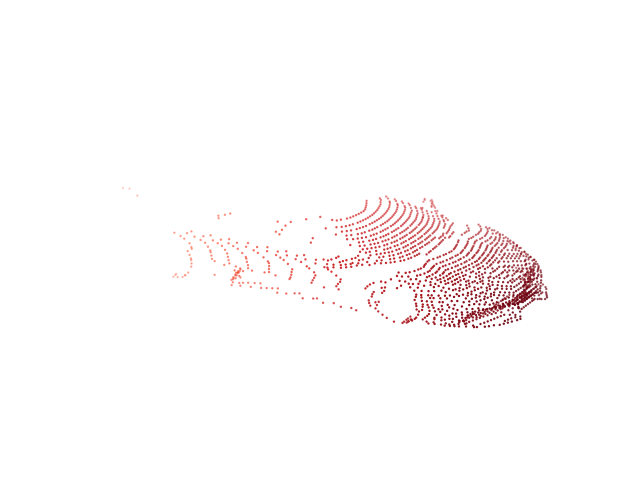

In [4]:
fig, axes = plt.subplots()
axes= plt.axes(projection='3d')

In [5]:
plt.show()

plot_pcd(axes, pcd)


<IPython.core.display.Javascript object>


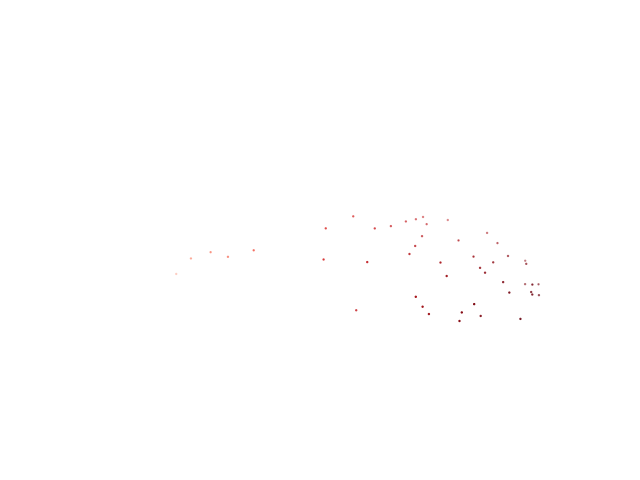

In [6]:
fig2, axes2 = plt.subplots()
axes2= plt.axes(projection='3d')

In [7]:
plt.show()
plot_pcd(axes2, pcd_downsample)

In [8]:
inputs = tf.placeholder(tf.float32, (1, None, 3))
gt = tf.placeholder(tf.float32, (1, 1638, 3))
model_module = importlib.import_module('.%s' %'pcn_cd', 'models')
model = model_module.Model(inputs, gt, tf.constant(1.0))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
sess = tf.Session(config=config)

saver = tf.train.Saver()
saver.restore(sess, '/code/data/trained_models/pcn_cd')


INFO:tensorflow:Restoring parameters from /code/data/trained_models/pcn_cd


In [9]:
pcd

array([[ 0.49961501, -0.0961798 , -0.06404379],
       [ 0.49638057, -0.09632843, -0.07333976],
       [ 0.48963881, -0.09678301, -0.08529559],
       ...,
       [ 0.05188084,  0.11275045, -0.08067776],
       [ 0.04225397,  0.11347809, -0.08420457],
       [ 0.01261795,  0.11587206, -0.08515778]])

In [10]:
complete = sess.run(model.outputs, feed_dict={inputs: [pcd]})[0]


In [11]:
complete.shape

(16384, 3)

In [12]:
complete_downsample = sess.run(model.outputs, feed_dict={inputs: [pcd_downsample]})[0]


<IPython.core.display.Javascript object>


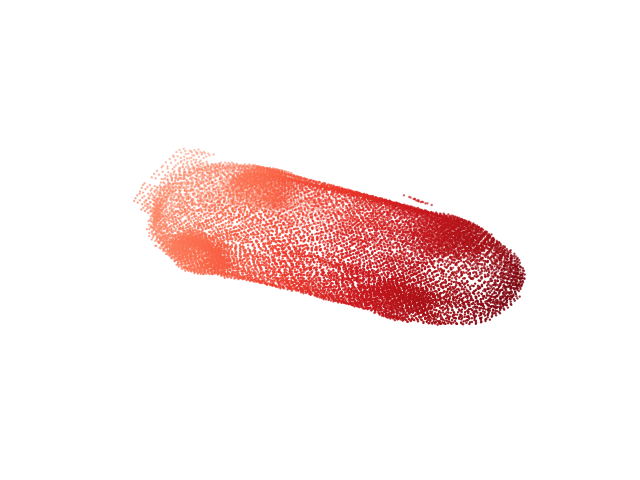

In [13]:
fig3, axes3 = plt.subplots()
axes3= plt.axes(projection='3d')

In [14]:
plt.show()
plot_pcd(axes3, complete)

<IPython.core.display.Javascript object>


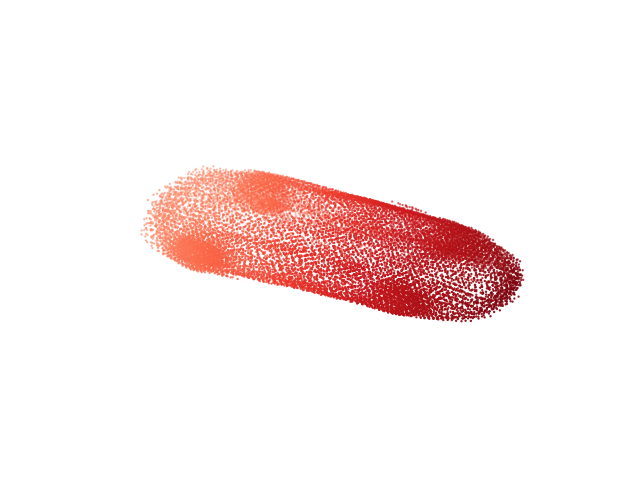

In [15]:
fig4, axes4 = plt.subplots()
axes4= plt.axes(projection='3d')

In [16]:
plt.show()
plot_pcd(axes4, complete_downsample)